### Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude)
and perform basic array operations.

Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), 
New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).

Convert the latitude and longitude values from degrees to radians using np.radians().

Calculate the element-wise difference between Tokyo and the other cities’ latitude and longitude in radians.

In [ ]:
import numpy as np
cities = ['Tokyo', 'New York', 'London' , 'Paris']
location = [(35.6895, 139.6917),(40.7128, -74.0060),(51.5074, -0.1278),(48.8566, 2.3522)]
location_array=np.array(location)

np.set_printoptions(precision=10,suppress=True)
radian_array = np.radians(location_array)

tokyo_radians = radian_array[0]

difference_radians = radian_array - tokyo_radians

difference_radians
    

### Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you’ll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

Load the world cities dataset from this URL using Pandas: opengeos/datasets

Display the first 5 rows and check for missing values.

Filter the dataset to only include cities with a population greater than 1 million.

Group the cities by their country and calculate the total population for each country.

Sort the cities by population in descending order and display the top 10 cities.

In [ ]:
import pandas as pd
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
#filepath = "c:\\world_cities.csv"
df=pd.read_csv(url)
df.head()

In [ ]:
filter_row = df[df.population > 1000000]
filter_row

In [ ]:
#Group the cities by their country and calculate the total population for each country.

In [ ]:
country_population=df.groupby('country')['population'].sum().reset_index()
country_population

Sort the cities by population in descending order and display the top 10 cities.

In [ ]:
least10 = df.sort_values('population',ascending=False)
least10.head(10)

# Exercise 3

In [ ]:
import geopandas as gpd

url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"

gdf=gpd.read_file(url)
gdf.head()

In [ ]:
# Create a plot of the building footprints and color them based on the building height (use the height_MS column)
gdf.plot("height_MS", legend = True , figsize = (10,6),cmap='Dark2' )

In [ ]:
# Create an interactive map of the building footprints and color them based on the building height (use the height_MS column)
gdf.explore("height_MS", legend = True)

In [ ]:
# Calculate the average building height (use the height_MS column)

average_height=gdf["height_MS"].mean()

average_height

In [ ]:
#Select buildings with a height greater than the average height.
selected_building = gdf[gdf["height_MS"] > average_height ]
selected_building

In [ ]:
#plotting the buildings having height greater than average haveage_height
selected_building.plot("height_MS", legend = True, figsize = (10,6))

In [ ]:
#Save the GeoDataFrame to a new GeoJSON file.
# write the geodata frame selected_buildings to file
selected_building.to_file("./selectedbuildings.GeoJSON")

In [ ]:
#Testing the selected building geojson file
gfile = gpd.read_file("./selectedbuildings.GeoJSON")
gfile.head()

# Exercise 4: Combining NumPy, Pandas, and GeoPandas
This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

Use Pandas to load the world cities dataset from this URL: opengeos/datasets

Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).

Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.

Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).

Calculate the distance (in meters) between each city and the city of Paris.

Plot the cities on a world map, coloring the points by their distance from Paris.

In [5]:
#Use Pandas to load the world cities dataset from this URL: opengeos/datasets
import pandas as pd
newurl = 'https://github.com/opengeos/datasets/releases/download/world/world_cities.csv'
pdf=pd.read_csv(newurl)

In [6]:
#Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
north_cities = pdf[(pdf['latitude'] >= -40) & (pdf['latitude'] <= 60)]
north_cities.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [7]:
#Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
import geopandas as gpd
city_geometry=gpd.GeoDataFrame(north_cities, geometry=gpd.points_from_xy(north_cities.longitude, north_cities.latitude))  
city_geometry.head()


,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (7.315 45.737)


In [8]:
#Reproject the GeoDataFrame to the Mercator projection (EPSG:3857)
city_geometry=city_geometry.set_crs(epsg=3857)
city_geometry.head()

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (32.533 0.583)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (7.315 45.737)


In [9]:
#Calculate the distance (in meters) between each city and the city of Paris.
import math
def calculate_distance(lat1,lon1,lat2,lon2):
     R = 6371  # Earth's radius in km
     lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])  # Convert to radians
     dlat = lat2 - lat1
     dlon = lon2 - lon1
     a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
     distance = R * c
     return distance



In [ ]:
paris_location = city_geometry[city_geometry['name'] == 'Paris']
paris_lat = paris_location['latitude'].values[0]
paris_lon = paris_location['longitude'].values[0]   
print(paris_lat, paris_lon)
city_geometry['distance_to_paris'] = city_geometry.apply(lambda row: calculate_distance(row['latitude'], row['longitude'], paris_lat, paris_lon), axis=1)
city_geometry['centroid'] = city_geometry.centroid
city_geometry.head()


48.86669 2.33334


,id,name,country,latitude,longitude,population,geometry,distance_to_paris,centroid
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (32.533 0.583),6095.528475,POINT (32.533 0.583)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (30.275 0.671),5987.782916,POINT (30.275 0.671)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (15.799 40.642),1398.827238,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (14.656 41.563),1258.709245,POINT (14.656 41.563)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (7.315 45.737),511.868347,POINT (7.315 45.737)


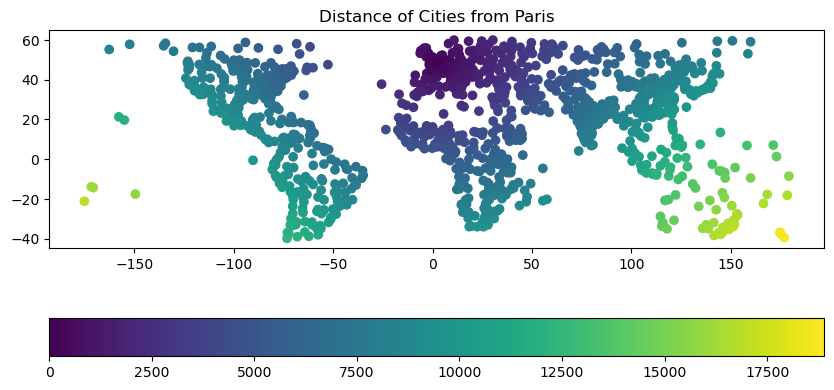

In [27]:

#Plot the cities on a world map, coloring the points by their distance from Paris.
import matplotlib.pyplot as plt
cities_map=city_geometry.plot(column='distance_to_paris', cmap='viridis', legend=True, 
                             figsize=(10, 6),
                            legend_kwds = 
                            {
                            'orientation': 'horizontal'        
                            }
                   )
cities_map.set_title("Distance of Cities from Paris")
plt.show()